In [1]:
import pandas as pd
import numpy as np

In [2]:
from geoprocessing import Disaster, TweetRaster

## Build the Raster

In [3]:
raster = TweetRaster(resolution=500000)

In [4]:
raster.load_tweets('data/tweets.csv', longitude_column='lng', latitude_column='lat', crs=4326)

In [5]:
raster.select_most_active_pixels(128)

## Create Disaster Objects

In [6]:
disaster_df = pd.read_csv("data/disasters.csv")
disaster_df = disaster_df.dropna(subset=["Latitude", "Longitude", "Disaster Subtype"])

In [7]:
disaster_objects = [Disaster(row) for _, row in disaster_df.iterrows()]

## Iterate through Disasters and Create Training Data

Features:
[0.1733512  0.97713879 0.12308188 0.         0.         1.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
Label:
0     -0.282051
1      0.152107
2      0.282222
3      0.074983
4      0.386946
         ...   
123   -0.613636
124   -0.028105
125   -0.068581
126   -0.148686
127   -0.270574
Length: 384, dtype: float64


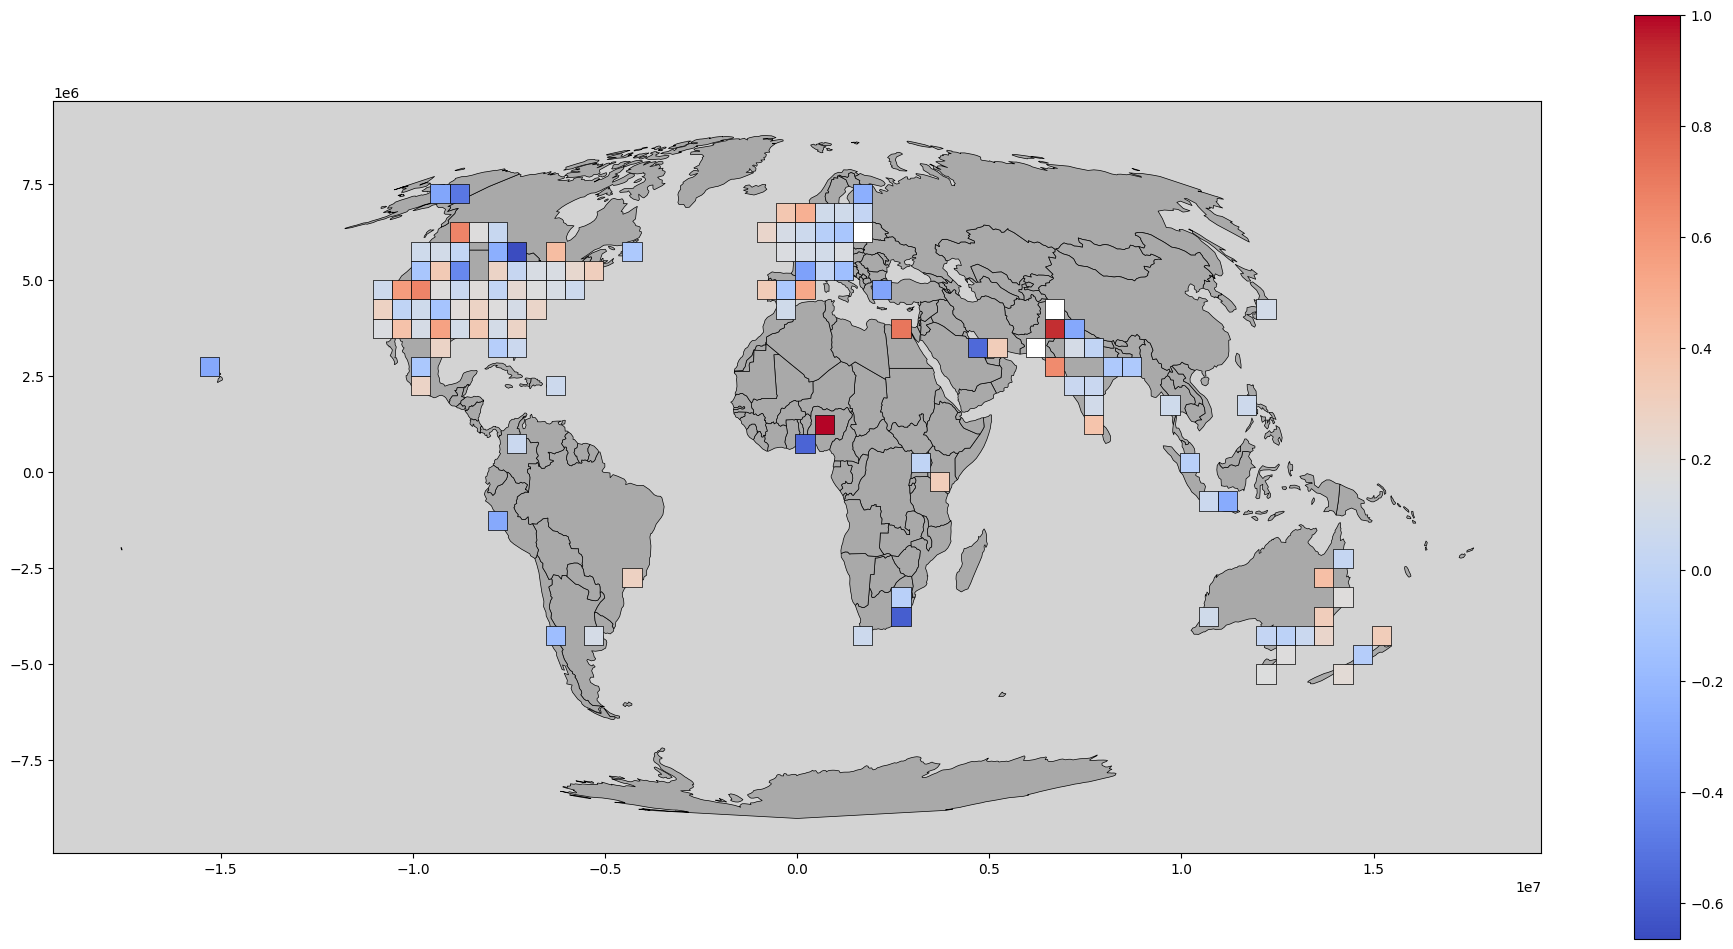

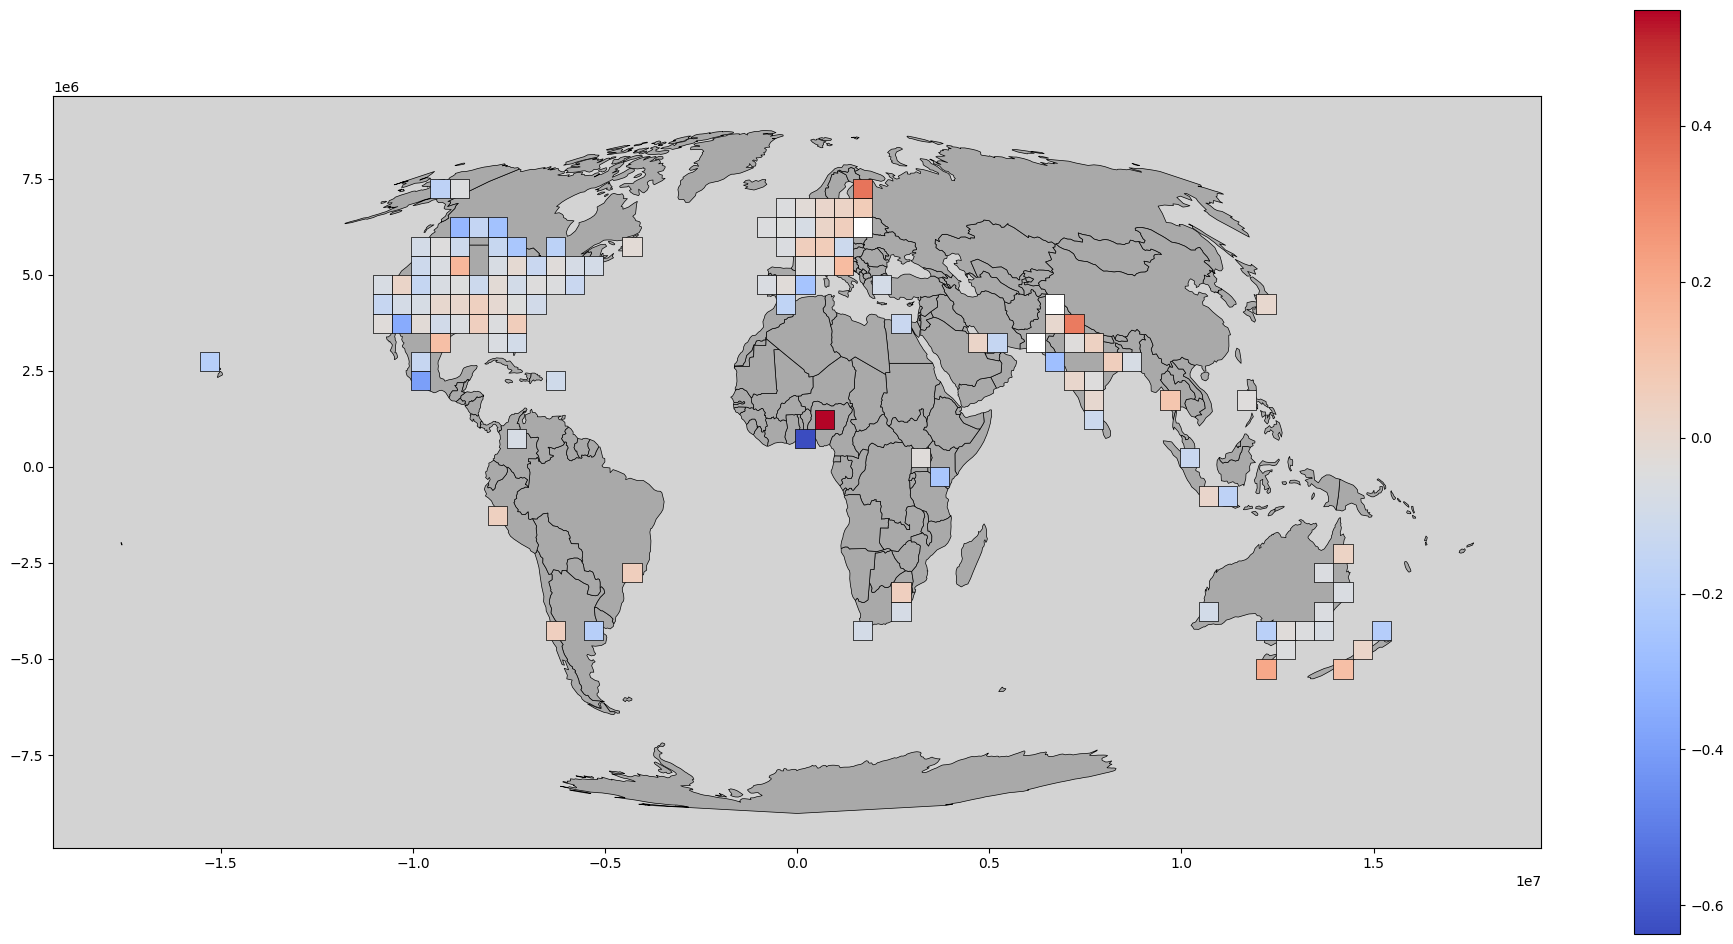

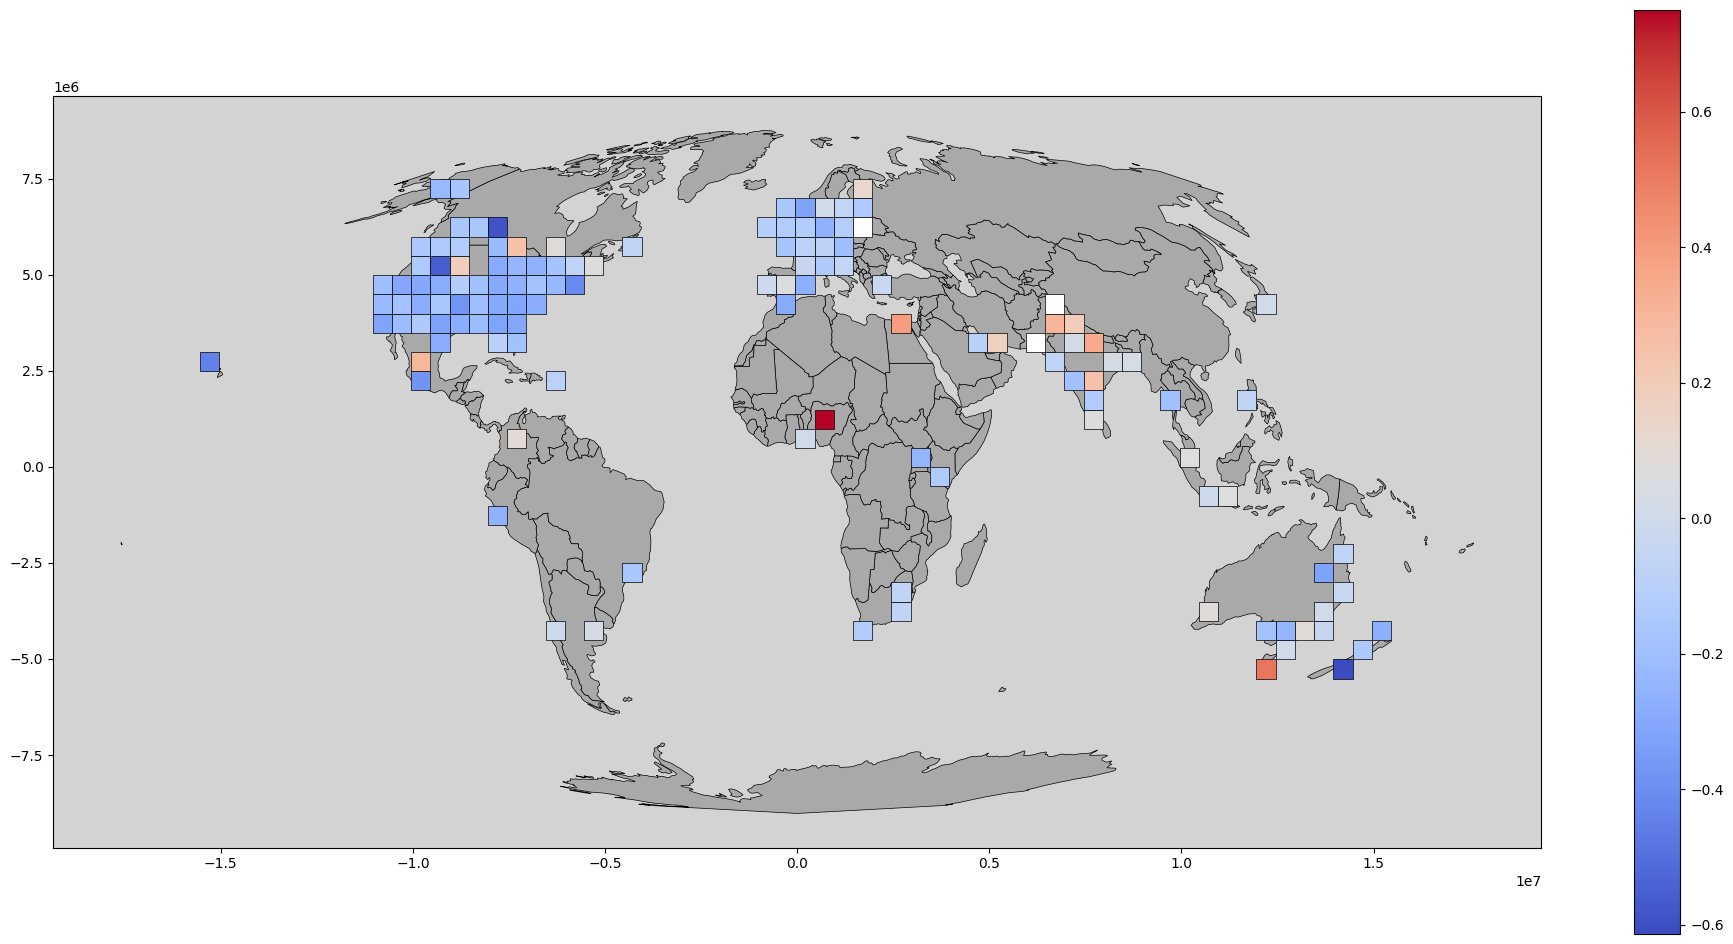

Features:
[0.15029389 0.97874729 0.13951876 0.         0.         1.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
Label:
0      0.155556
1     -0.232213
2     -0.026740
3      0.017902
4     -0.465608
         ...   
123   -0.187500
124   -0.178626
125    0.043956
126   -0.360122
127   -0.034759
Length: 384, dtype: float64


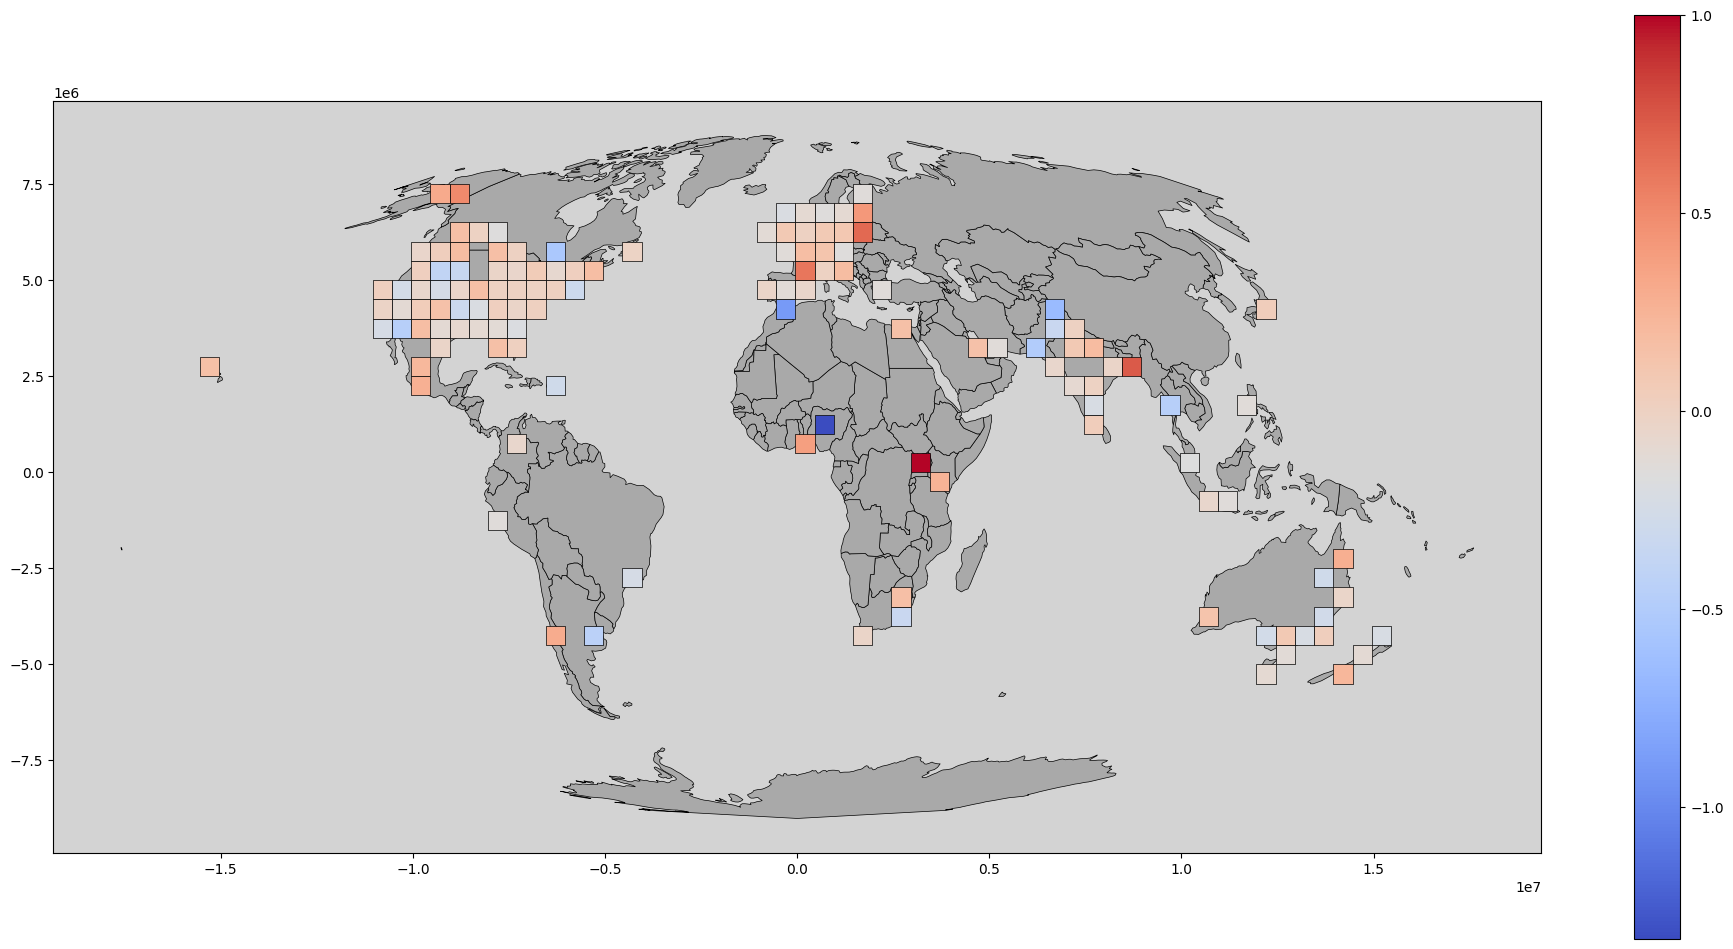

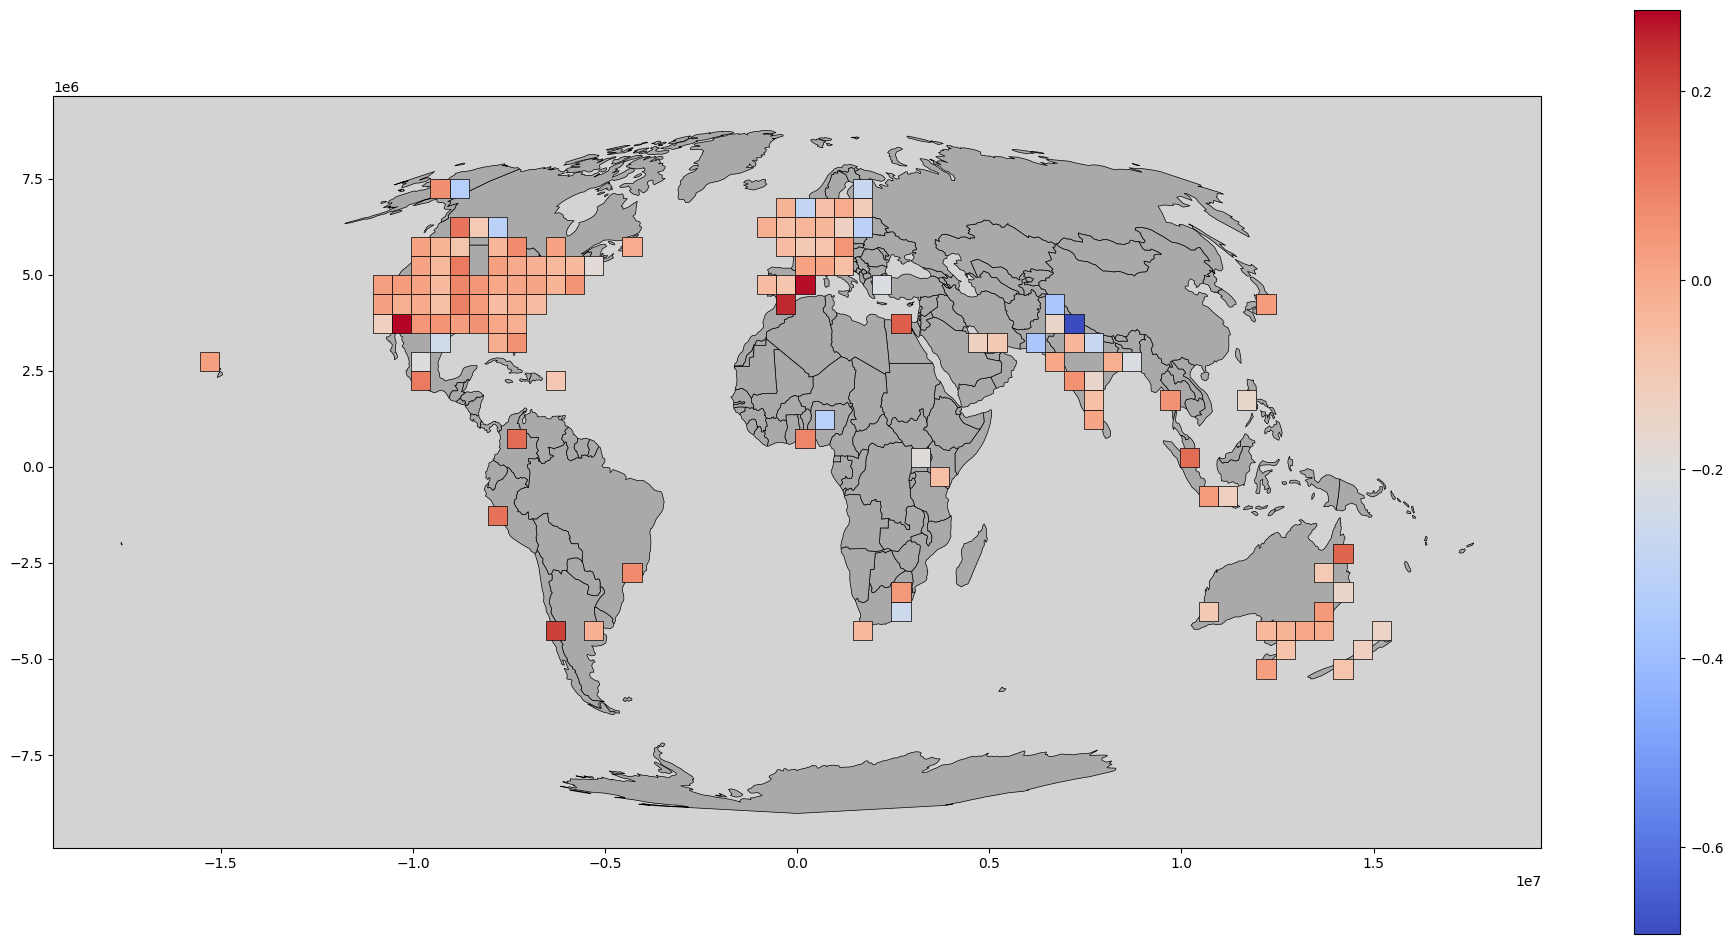

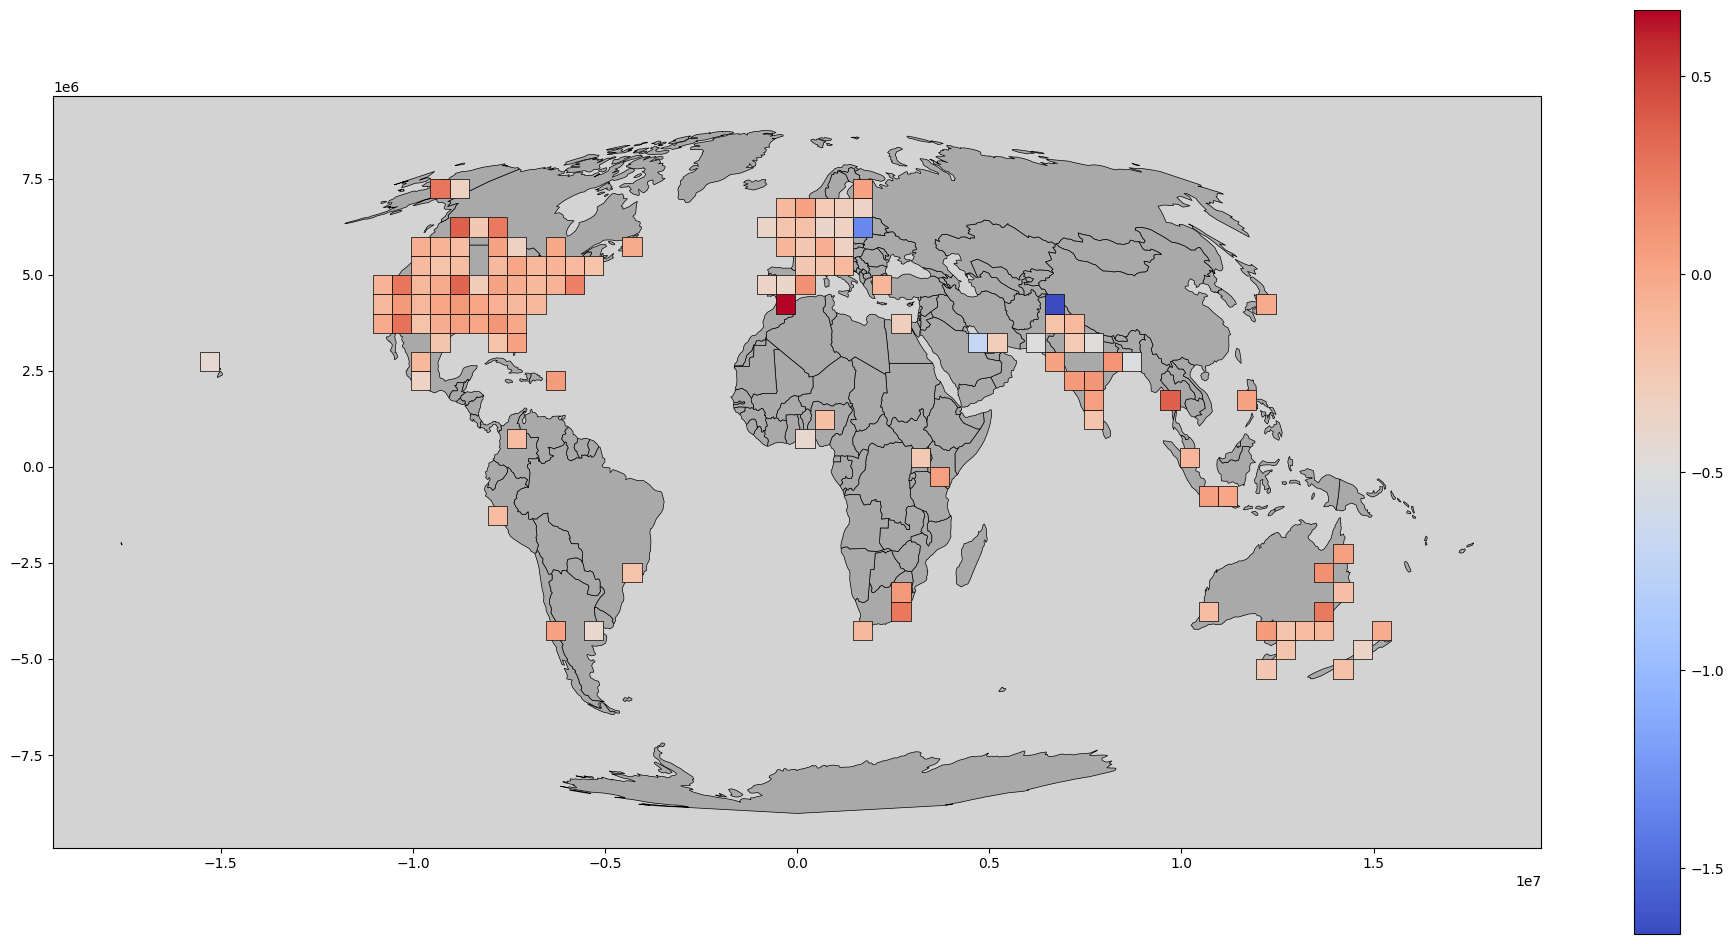

Features:
[ 0.84385786 -0.10032522  0.52710412  0.          0.          1.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.        ]
Label:
0      0.230769
1     -0.141778
2     -0.179115
3     -0.062062
4     -0.518919
         ...   
123   -0.005435
124   -0.236051
125   -0.017857
126   -0.310924
127   -0.011905
Length: 384, dtype: float64


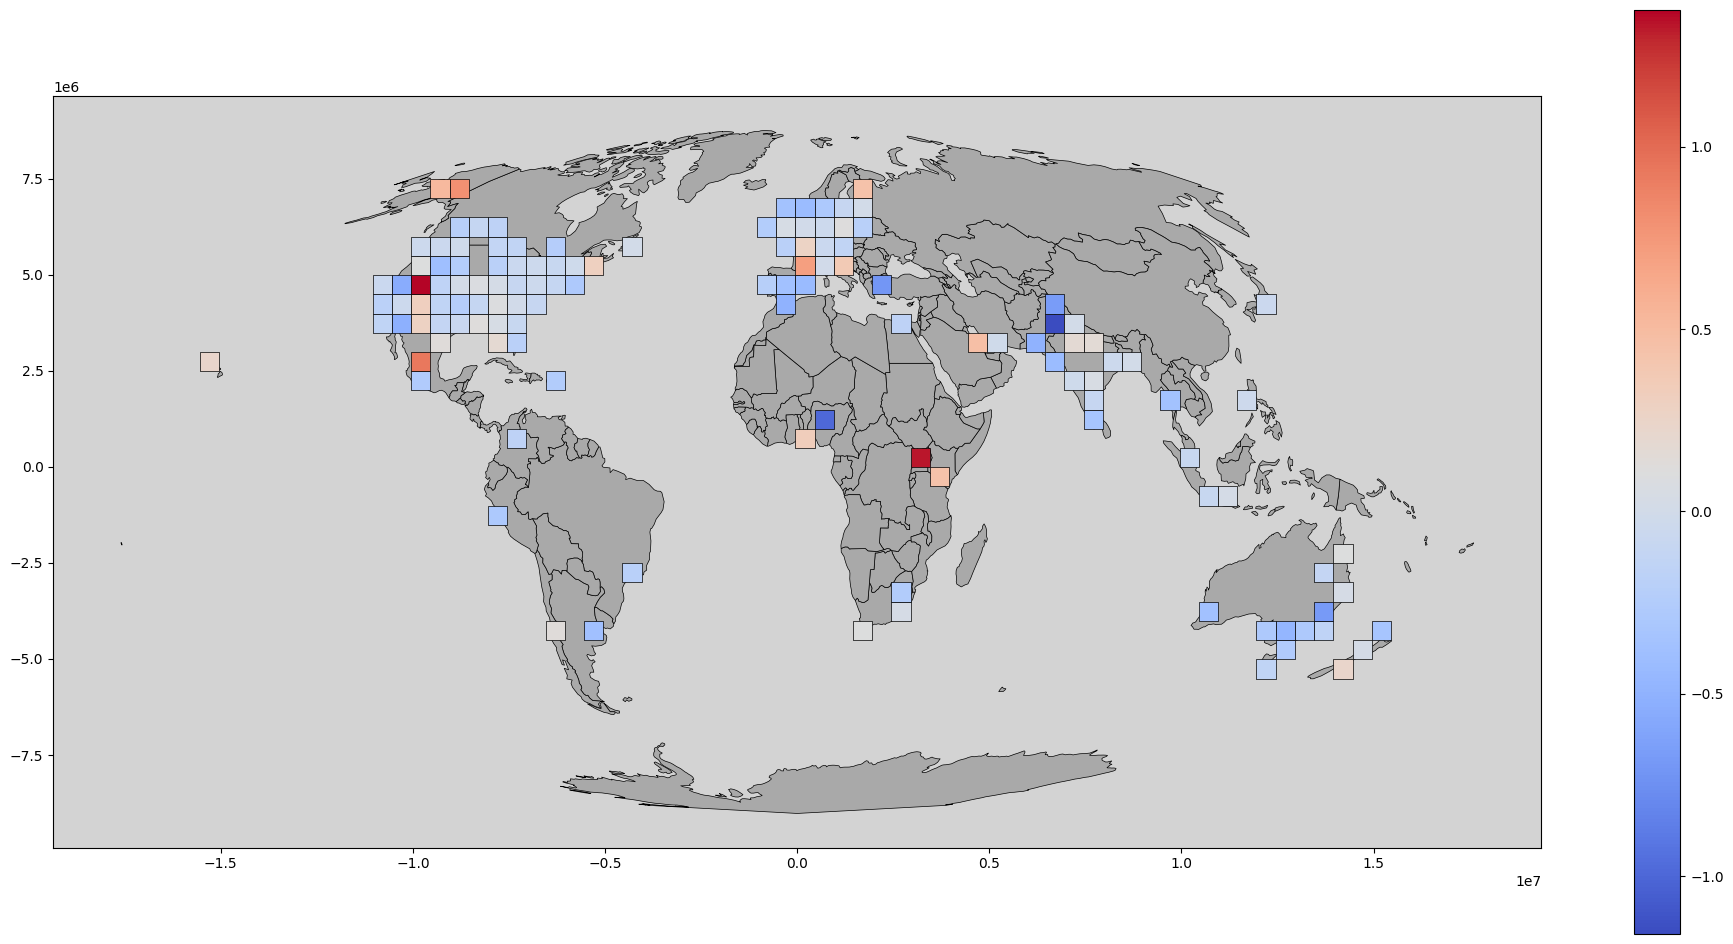

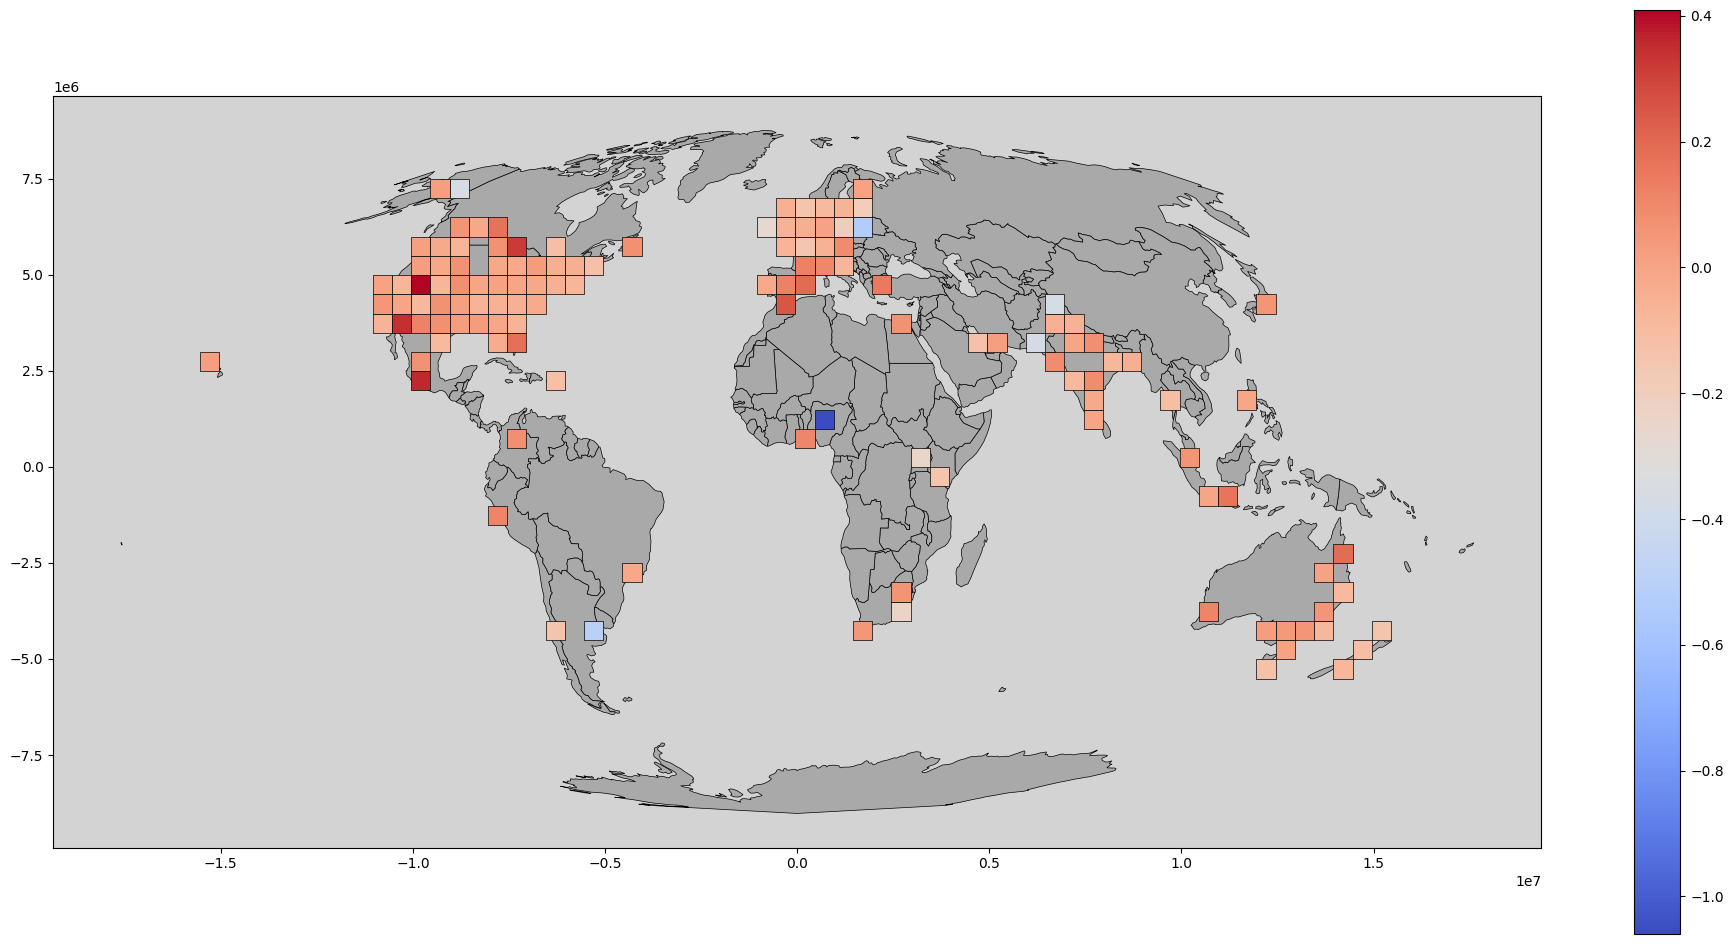

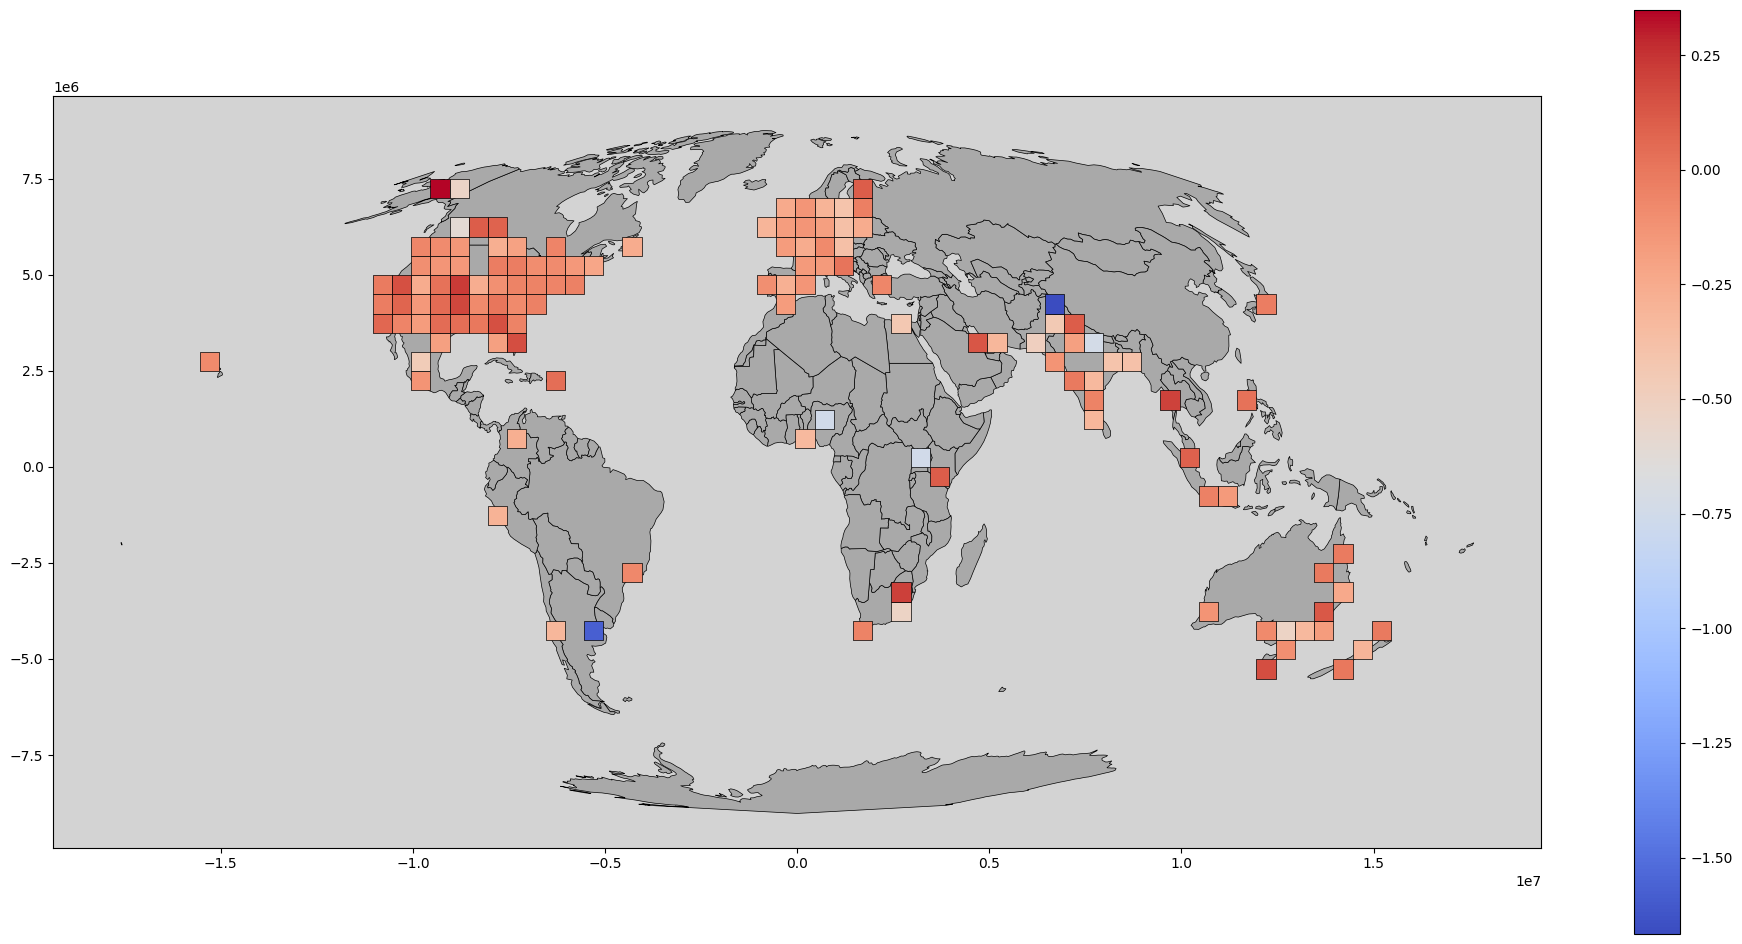

In [8]:
for disaster in disaster_objects[500:503]:
    
    feature_vector = disaster.get_feature_vector()
    
    time_range_A, time_range_B = disaster.get_time_range(days_before=30, days_after=30)
    
    difference = raster.compute_difference(time_range_A, time_range_B)
    
    label_vector = pd.concat([difference['aggressiveness_diff'],
                             difference['sentiment_diff'],
                             difference['stance_diff']])
    
    print('Features:')
    print(feature_vector)
    print('Label:')
    print(label_vector)
    
    raster.plot_values(difference, 'aggressiveness_diff')
    raster.plot_values(difference, 'sentiment_diff')
    raster.plot_values(difference, 'stance_diff')